# Gerekli Kütüphaneler

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Dataset'i Yükleme

In [181]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Phishing_Legitimate_full.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "shashwatwork/phishing-dataset-for-machine-learning",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)



Using Colab cache for faster access to the 'phishing-dataset-for-machine-learning' dataset.


In [182]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [183]:
df.shape

(10000, 50)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [185]:
df["CLASS_LABEL"].value_counts()


,count
CLASS_LABEL,
1,5000
0,5000


In [186]:
df.isnull().sum()


,0
id,0
NumDots,0
SubdomainLevel,0
PathLevel,0
UrlLength,0
NumDash,0
NumDashInHostname,0
AtSymbol,0
TildeSymbol,0
NumUnderscore,0


In [187]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols = num_cols.drop(["CLASS_LABEL", "id"], errors="ignore")

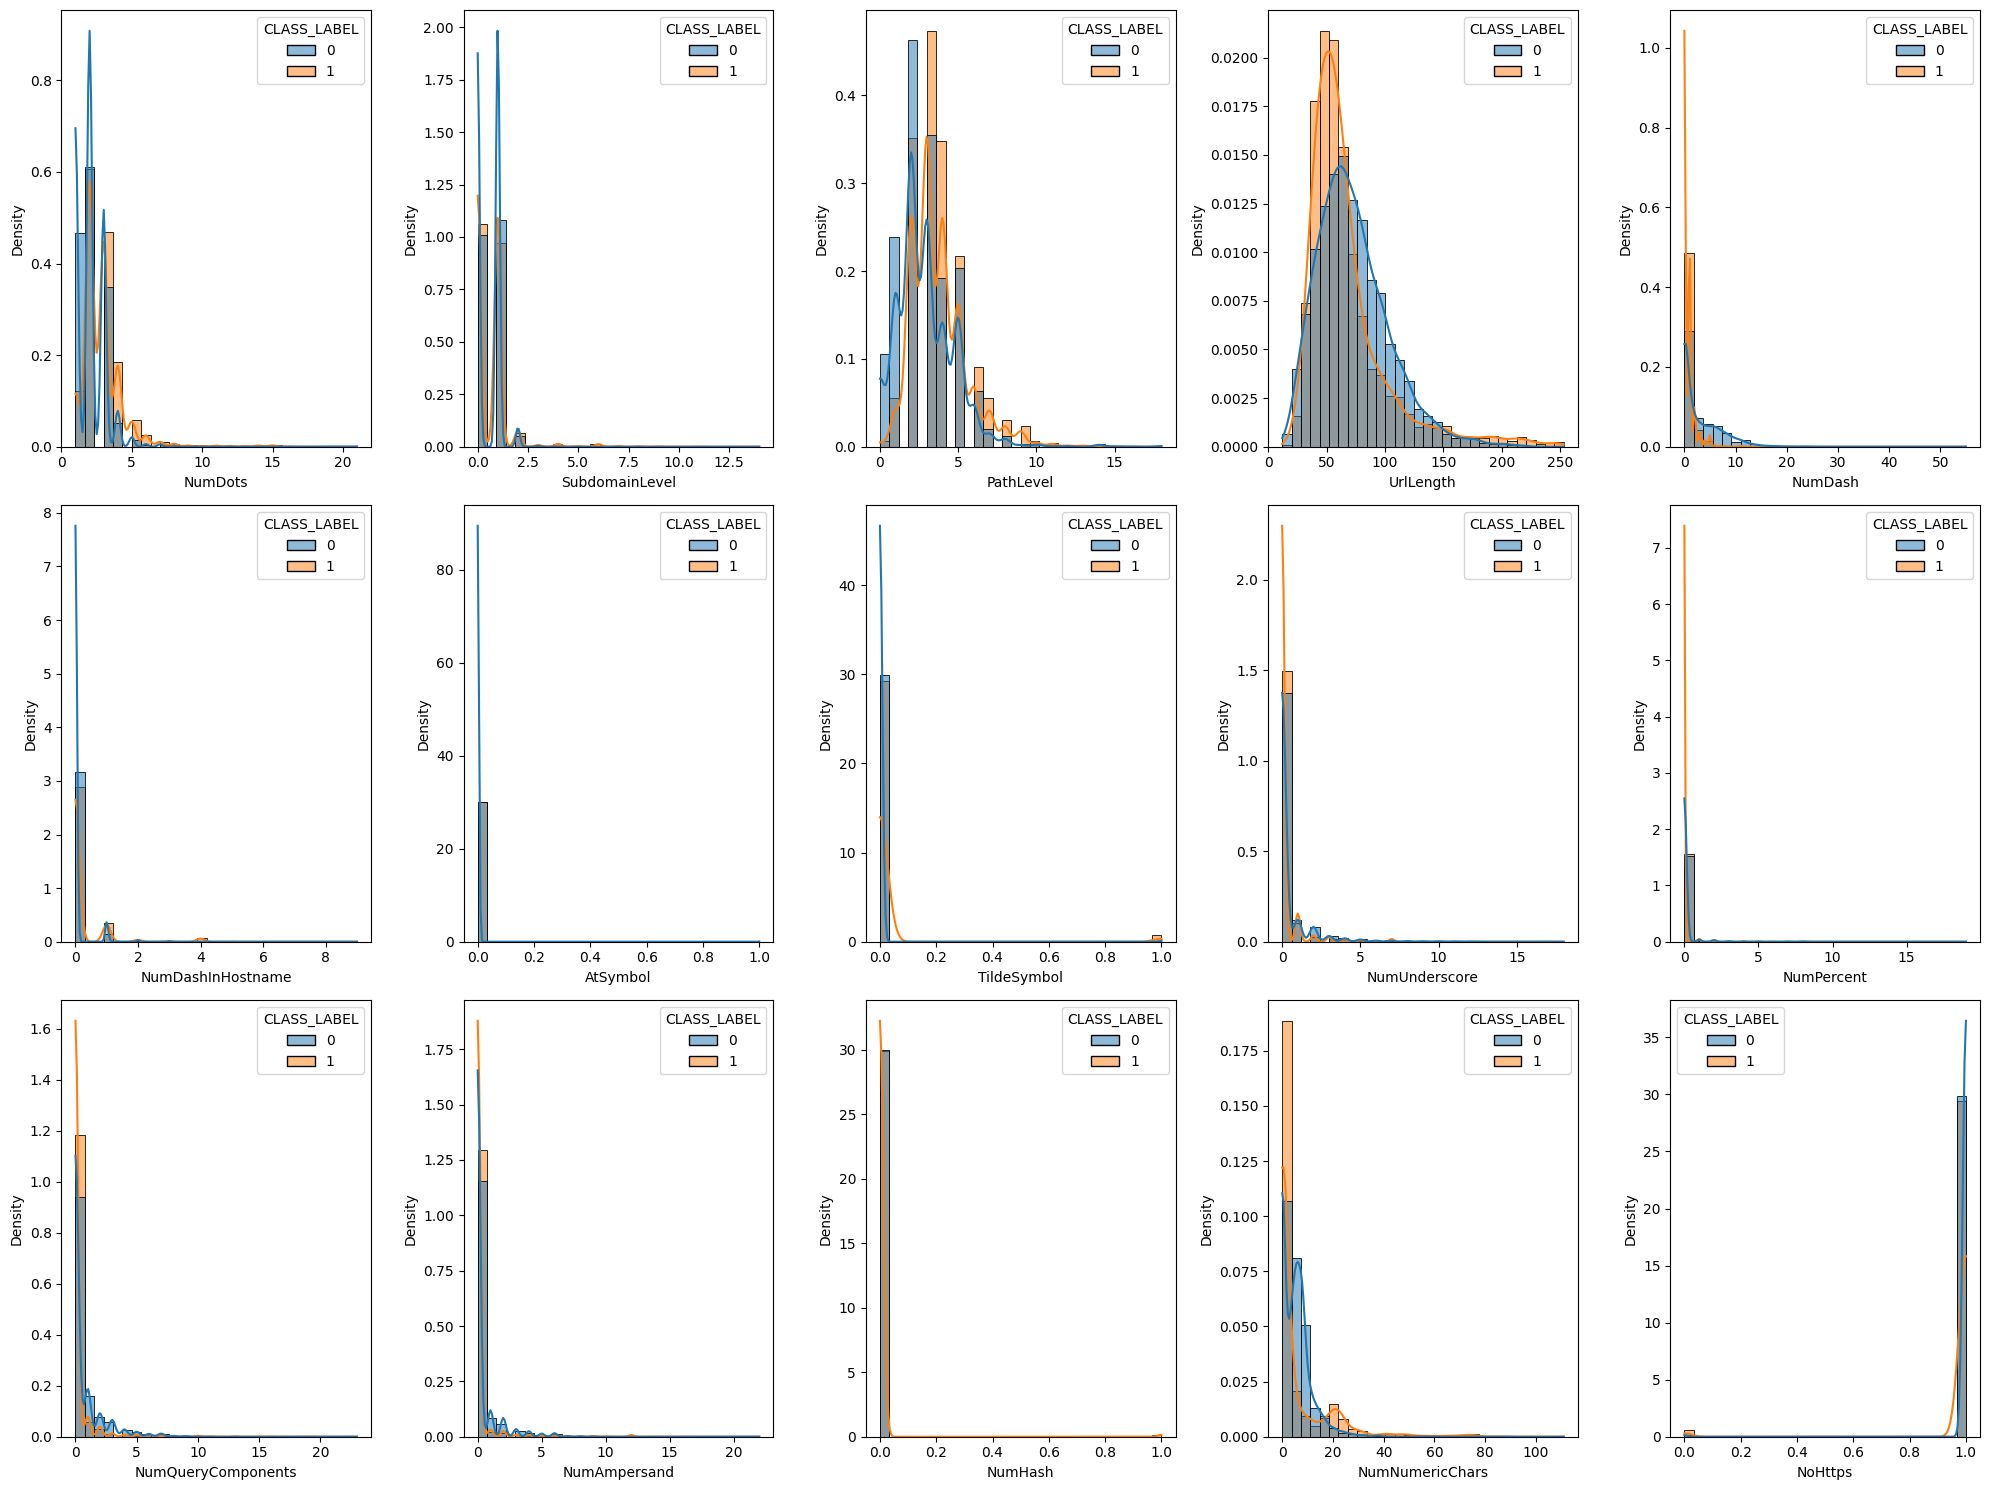

In [188]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 15:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(
            data=df,
            x=column,
            hue="CLASS_LABEL",
            kde=True,
            bins=30,
            stat="density",
            common_norm=False
        )
        plt.xlabel(column)
        plt.ylabel("Density")

    plotnumber += 1

plt.tight_layout()
plt.show()


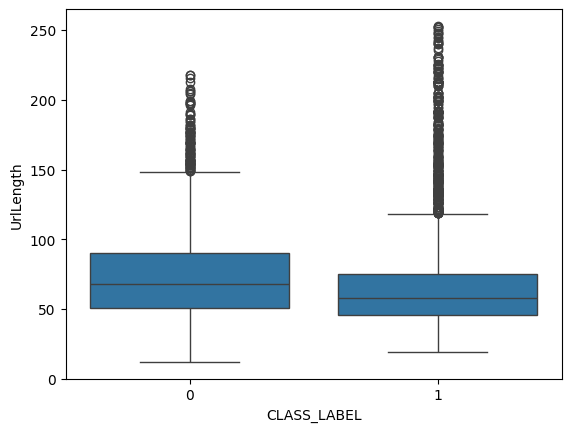

In [189]:
sns.boxplot(x="CLASS_LABEL", y="UrlLength", data=df)
plt.show()


In [190]:
X = df.drop(columns=["CLASS_LABEL", "id"])
y = df["CLASS_LABEL"]


# Logistic Regresyon

In [191]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [192]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)


In [193]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1000
           1       0.94      0.96      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



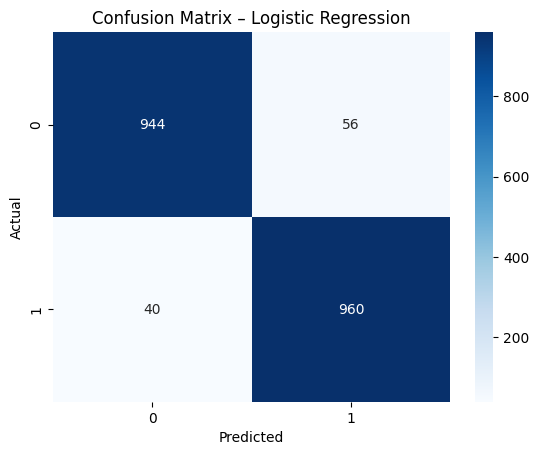

In [194]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


# Random Forest

In [195]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [196]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       0.99      0.98      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.98      0.98      2000



In [197]:

joblib.dump(rf, "phishing_model.pkl")


['phishing_model.pkl']

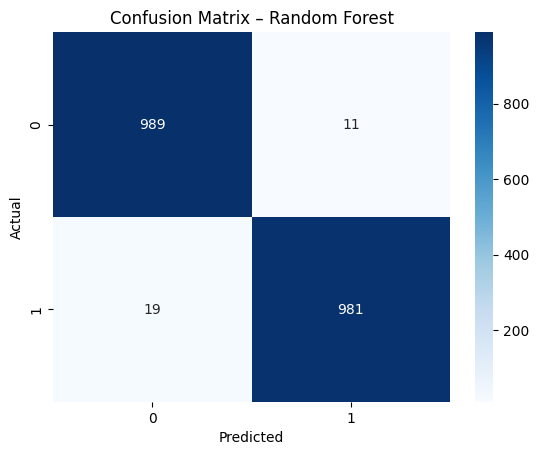

In [198]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()


In [199]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


,0
PctExtHyperlinks,0.189631
PctExtNullSelfRedirectHyperlinksRT,0.165526
FrequentDomainNameMismatch,0.081981
PctExtResourceUrls,0.075852
PctNullSelfRedirectHyperlinks,0.072103
NumDash,0.044024
NumNumericChars,0.035649
ExtMetaScriptLinkRT,0.034250
InsecureForms,0.031554
PathLevel,0.028262


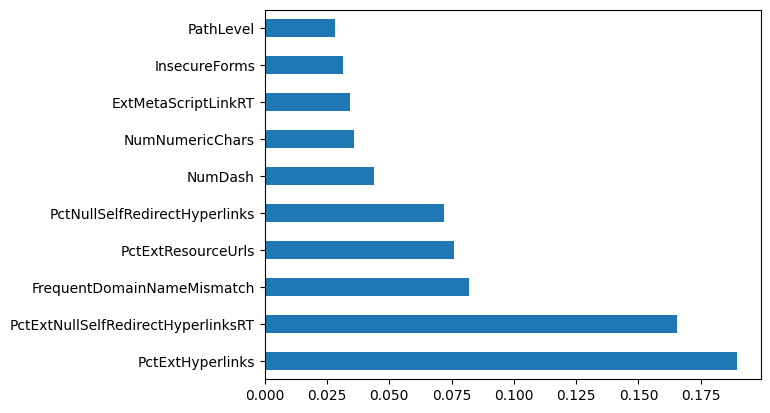

In [200]:
importances.head(10).plot(kind="barh")
plt.show()


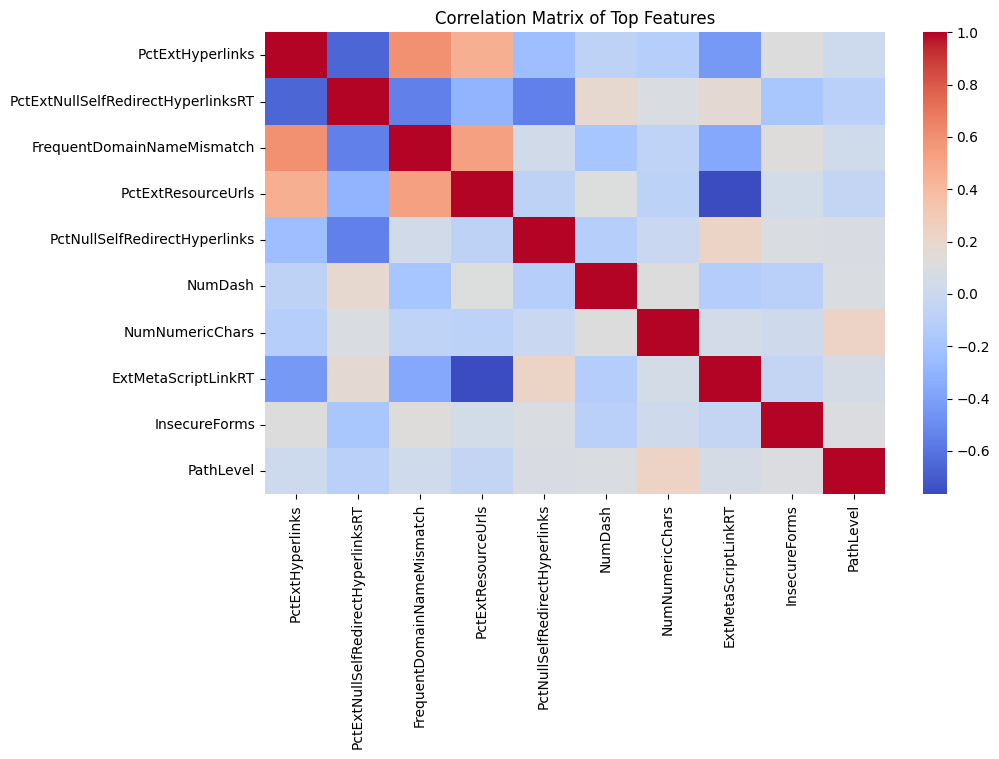

In [201]:
top_features = importances.head(10).index
plt.figure(figsize=(10,6))
sns.heatmap(df[top_features].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Top Features")
plt.show()


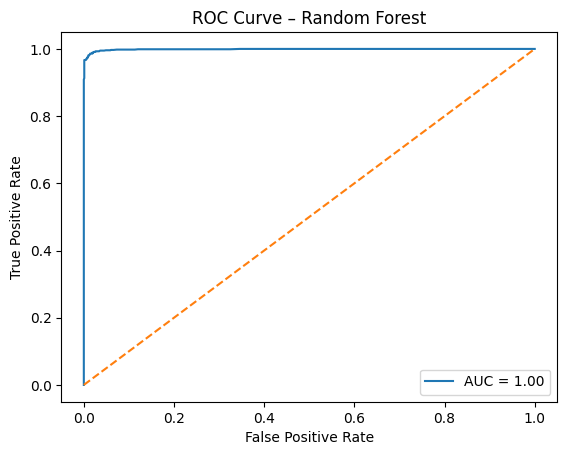

In [202]:
from sklearn.metrics import roc_curve, auc

y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()


# Örnek

In [203]:
sample = {
    "NumDots": 5,
    "SubdomainLevel": 6,
    "PathLevel": 7,
    "UrlLength": 120,
    "NumDash": 5,
    "NumDashInHostname": 1,
    "AtSymbol": 0,
    "TildeSymbol": 0,
    "NumUnderscore": 2,
    "NumPercent": 1,
    "NumQueryComponents": 2,
    "NumAmpersand": 3,
    "NumHash": 0,
    "NumNumericChars": 20,
    "NoHttps": 1,
    "RandomString": 1,
    "IpAddress": 0,
    "DomainInSubdomains": 1,
    "DomainInPaths": 1,
    "HttpsInHostname": 0,
    "HostnameLength": 40,
    "PathLength": 60,
    "QueryLength": 40,
    "DoubleSlashInPath": 1,
    "NumSensitiveWords": 2,
    "EmbeddedBrandName": 1,
    "PctExtHyperlinks": 0.85,
    "PctExtResourceUrls": 0.88,
    "ExtFavicon": 1,
    "InsecureForms": 1,
    "RelativeFormAction": 0,
    "ExtFormAction": 1,
    "AbnormalFormAction": 1,
    "PctNullSelfRedirectHyperlinks": 0.6,
    "FrequentDomainNameMismatch": 1,
    "FakeLinkInStatusBar": 1,
    "RightClickDisabled": 1,
    "PopUpWindow": 1,
    "SubmitInfoToEmail": 0,
    "IframeOrFrame": 1,
    "MissingTitle": 1,
    "ImagesOnlyInForm": 1,
    "SubdomainLevelRT": 1,
    "UrlLengthRT": 1,
    "PctExtResourceUrlsRT": 1,
    "AbnormalExtFormActionR": 1,
    "ExtMetaScriptLinkRT": 1,
    "PctExtNullSelfRedirectHyperlinksRT": 1
}


In [204]:
sample_df = pd.DataFrame([sample])
sample_df = sample_df.reindex(columns=X.columns, fill_value=0)


In [205]:
prediction = rf.predict(sample_df)
probability = rf.predict_proba(sample_df)

print("Tahmin:", "Phishing" if prediction[0] == 1 else "Legitimate")
print("Phishing Olasılığı:", probability[0][1])


Tahmin: Phishing
Phishing Olasılığı: 0.67


In [206]:
# Eğitim setinden gerçek phishing ve güvenli örnek alıyoruz
real_phishing = df[df["CLASS_LABEL"] == 1].sample(1, random_state=42)
real_safe = df[df["CLASS_LABEL"] == 0].sample(1, random_state=42)


demo_features = [
    "PctExtHyperlinks",
    "PctExtNullSelfRedirectHyperlinksRT",
    "FrequentDomainNameMismatch",
    "PctExtResourceUrls",
    "PctNullSelfRedirectHyperlinks",
    "NumDash",
    "NumNumericChars",
    "ExtMetaScriptLinkRT",
    "InsecureForms",
    "PathLevel"
]

phishing_example = real_phishing[demo_features].values.flatten().tolist()
safe_example = real_safe[demo_features].values.flatten().tolist()


In [207]:
import gradio as gr
import joblib
import pandas as pd

model = joblib.load("phishing_model.pkl")
ALL_FEATURES = model.feature_names_in_
def predict_phishing(
    pct_ext_hyperlinks,
    pct_ext_null_redirect_rt,
    frequent_domain_mismatch,
    pct_ext_resource_urls,
    pct_null_self_redirect,
    num_dash,
    num_numeric_chars,
    ext_meta_script_rt,
    insecure_forms,
    path_level
):

    input_dict = {f: 0 for f in ALL_FEATURES}


    input_dict.update({
        "PctExtHyperlinks": pct_ext_hyperlinks,
        "PctExtNullSelfRedirectHyperlinksRT": pct_ext_null_redirect_rt,
        "FrequentDomainNameMismatch": frequent_domain_mismatch,
        "PctExtResourceUrls": pct_ext_resource_urls,
        "PctNullSelfRedirectHyperlinks": pct_null_self_redirect,
        "NumDash": num_dash,
        "NumNumericChars": num_numeric_chars,
        "ExtMetaScriptLinkRT": ext_meta_script_rt,
        "InsecureForms": insecure_forms,
        "PathLevel": path_level
    })

    input_df = pd.DataFrame([input_dict])
    prob = model.predict_proba(input_df)[0][1]

    return (
        f"🎣 Phishing ({prob:.2f})"
        if prob >= 0.5
        else f"✅ Güvenli ({1 - prob:.2f})"
    )



In [208]:
interface = gr.Interface(
    fn=predict_phishing,
    inputs=[
        gr.Slider(0, 1, label="PctExtHyperlinks"),
        gr.Slider(0, 1, label="PctExtNullSelfRedirectHyperlinksRT"),
        gr.Dropdown([-1,0, 1], label="FrequentDomainNameMismatch"),
        gr.Slider(0, 1, label="PctExtResourceUrls"),
        gr.Slider(0, 1, label="PctNullSelfRedirectHyperlinks"),
        gr.Number(label="NumDash"),
        gr.Number(label="NumNumericChars"),
        gr.Dropdown([-1,0, 1], label="ExtMetaScriptLinkRT"),
        gr.Dropdown([-1,0, 1], label="InsecureForms"),
        gr.Number(label="PathLevel")
    ],
    outputs="text",
    title="Phishing Website Detection (Key Features)",
    examples=[
        phishing_example,
        safe_example
    ]
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://07f4db1cae0ac9f4f8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
